### Problem Statement:

#### Refer Telecom Churn Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using a decision tree. Analyze the performance of the model with suitable evaluation measures.

### Importing libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Load telecom churn dataset

In [3]:
df = pd.read_csv('Telco-Customer-Churn 1.csv', header=0)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Data description

`customerID`: Customer ID \
`gender`: Customer gender (Male/Female) \
`SeniorCitizen`: Whether the customer is a senior citizen or not (1/0) \
`Partner`: Whether the customer has a partner or not (Yes/No) \
`Dependents`: Whether the customer is dependent (Yes/No) \
`tenure`: For how long the customer has been associated with the company (in months) \
`PhoneService`: Whether the customer has phone service or not (Yes/No) \
`MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service) \
`InternetService`: Type of internet service the customer uses (DSL/ Fiber optic/ No) \
`OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service) \
`OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service) \
`DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service) \
`TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service) \
`StreamingTV`: Whether the customer use streaming service on TV (Yes, No, No internet service) \
`StreamingMovies`: Whether the customer stream movies (Yes, No, No internet service) \
`Contract`: Type of contract the customer is on with the company (Month-to-month, One year, Two year) \
`PaperlessBilling`: Whether the customer uses paperless billing or not (Yes/No) \
`PaymentMethod`: Type of payment method the customer uses for billing (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) \
`MonthlyCharges`: Monthly chargers paid by the customer. \
`TotalCharges`: Total amount charged to the customer. \
`Churn`: Whether the customer churn or not (Yes/No) \

In [5]:
df.shape

(7043, 21)

There are total 21 columns in the dataset with 7043 customer entries.

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum ()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

There are no null or duplicate values in the dataset but the datatypes needs to be changes.

#### Changing data types

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

### Exploratory data analysis

Univariate analysis with churn as our target variable

#### Scatter plot

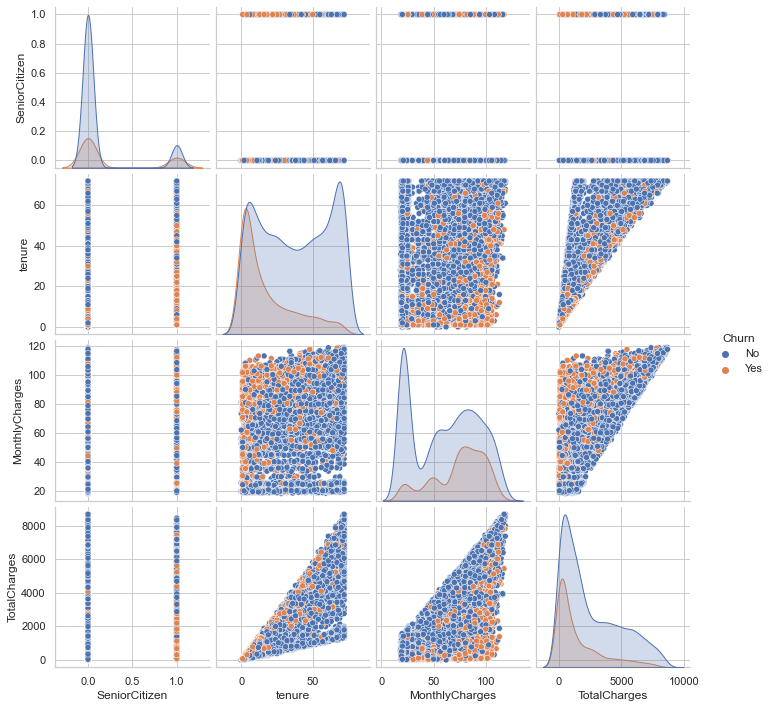

In [10]:
sns.pairplot(df, hue='Churn')
plt.show()

#### Churn count plot

<AxesSubplot:>

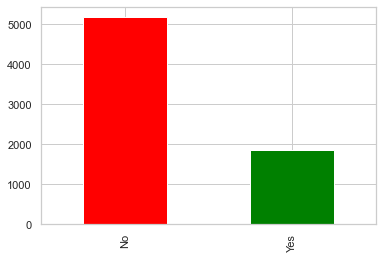

In [11]:
count = df['Churn'].value_counts()
count.plot(kind = 'bar', color = ('red','green'))

In [12]:
count

No     5174
Yes    1869
Name: Churn, dtype: int64

Out of the total number of customers in the dataset, 5174 customers didn't produce churn while 1869 customers did.

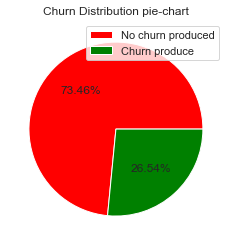

In [13]:
label=['No churn produced', 'Churn produce']
plt.pie(count, autopct='%1.2f%%', colors=('red', 'green'))
plt.title('Churn Distribution pie-chart')
plt.legend(label, loc=1)
plt.show()

26.54% of the customers produced churn.

### Bar plot of churn vs different attributes

#### Barplot of Churn Vs Contract

Text(0, 0.5, 'Frequency of churn')

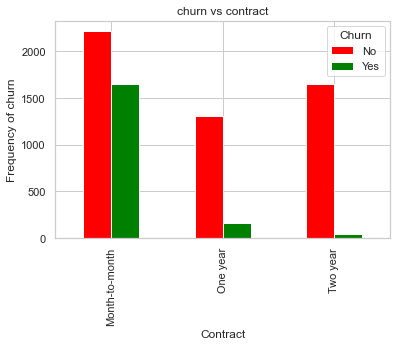

In [14]:
%matplotlib inline
pd.crosstab(df.Contract,df.Churn).plot(kind='bar',color=('red','green'))
plt.title('churn vs contract')
plt.xlabel('Contract')
plt.ylabel('Frequency of churn')

There are more churns produced by the customers on month-to-month contract than any other contracts.

#### Barplot of Churn vs Paperless Billing

Text(0, 0.5, 'Frequency of churn')

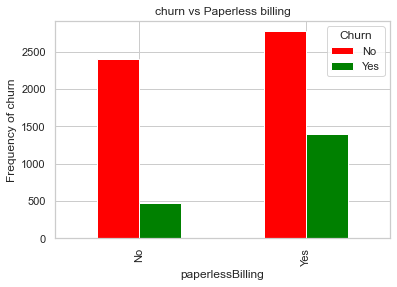

In [16]:
%matplotlib inline
pd.crosstab(df.PaperlessBilling,df.Churn).plot(kind='bar',color=('red','green'))
plt.title('churn vs Paperless billing')
plt.xlabel('paperlessBilling')
plt.ylabel('Frequency of churn')

Customers with paperless billing are more likely to produce churn as compared to the customer who do not use paperless billings.

#### Barplot of Churn vs Phoneservice

Text(0, 0.5, 'frequency of churn ')

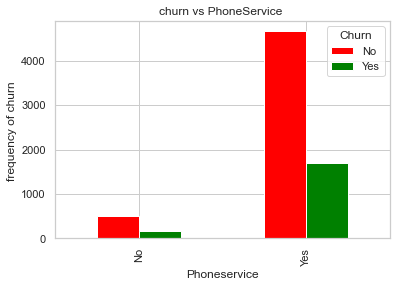

In [19]:
%matplotlib inline
pd.crosstab(df.PhoneService ,df.Churn).plot(kind='bar',color=('red','green'))
plt.title('churn vs PhoneService ')
plt.xlabel('Phoneservice')
plt.ylabel('frequency of churn ')

The churn rate in customer having Phoneservice is comapatively high than customer with no phonservice

#### Barplot of Churn vs InternetService

Text(0, 0.5, 'frequency of churn ')

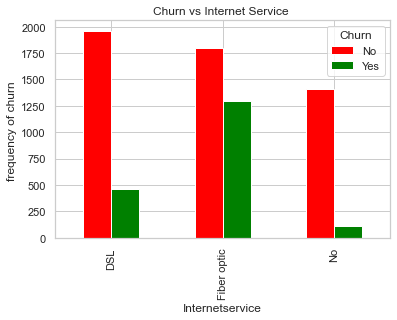

In [22]:
%matplotlib inline
pd.crosstab(df.InternetService ,df.Churn).plot(kind='bar',color=('red','green'))
plt.title('Churn vs Internet Service ')
plt.xlabel('Internetservice')
plt.ylabel('frequency of churn ')

Customers using Fiber optic are more likely to churn

#### Barplot of Churn vs SeniorCitizen

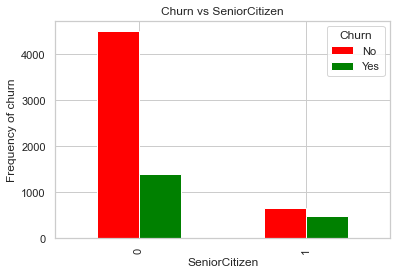

In [24]:
%matplotlib inline
pd.crosstab(df.SeniorCitizen,df.Churn).plot(kind='bar',color=('red','green'))
plt.title('Churn vs SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Frequency of churn')
plt.show()

There are more churns when the customer is not a senior citizen, but the rate of churn in case of senior citizen is more.

#### Correlation matrices

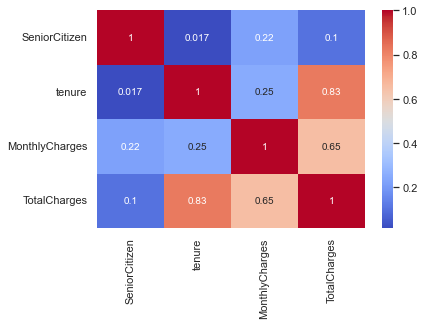

In [25]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Model Building

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data preparation

In [27]:
df.Churn.replace({'Yes':1 , 'No':0},inplace=True)

In [28]:
data=pd.get_dummies(data=df,columns=['gender','Partner','Dependents','OnlineBackup','StreamingMovies','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod'],drop_first=True)
data

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,OnlineBackup_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,0,0,1,1,0,...,0,0,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,4,74.40,306.60,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [29]:
data = data.drop(columns = ['customerID'])

In [30]:
X = data.drop(columns = 'Churn')
Y = data['Churn']   # Target Variable

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state =0)

In [33]:
model=DecisionTreeClassifier(max_depth=5)

In [34]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [35]:
prediction=model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1560
           1       0.60      0.55      0.57       553

    accuracy                           0.79      2113
   macro avg       0.72      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



In [37]:
confusion_matrix(prediction,Y_test)

array([[1362,  250],
       [ 198,  303]], dtype=int64)

In [39]:
accuracy_score(prediction,Y_test)

0.7879791765262659

In [40]:
model.score(X_train,Y_train)

0.8022312373225152

In [41]:
model.score(X_test,Y_test)

0.7879791765262659

### Decision Tree

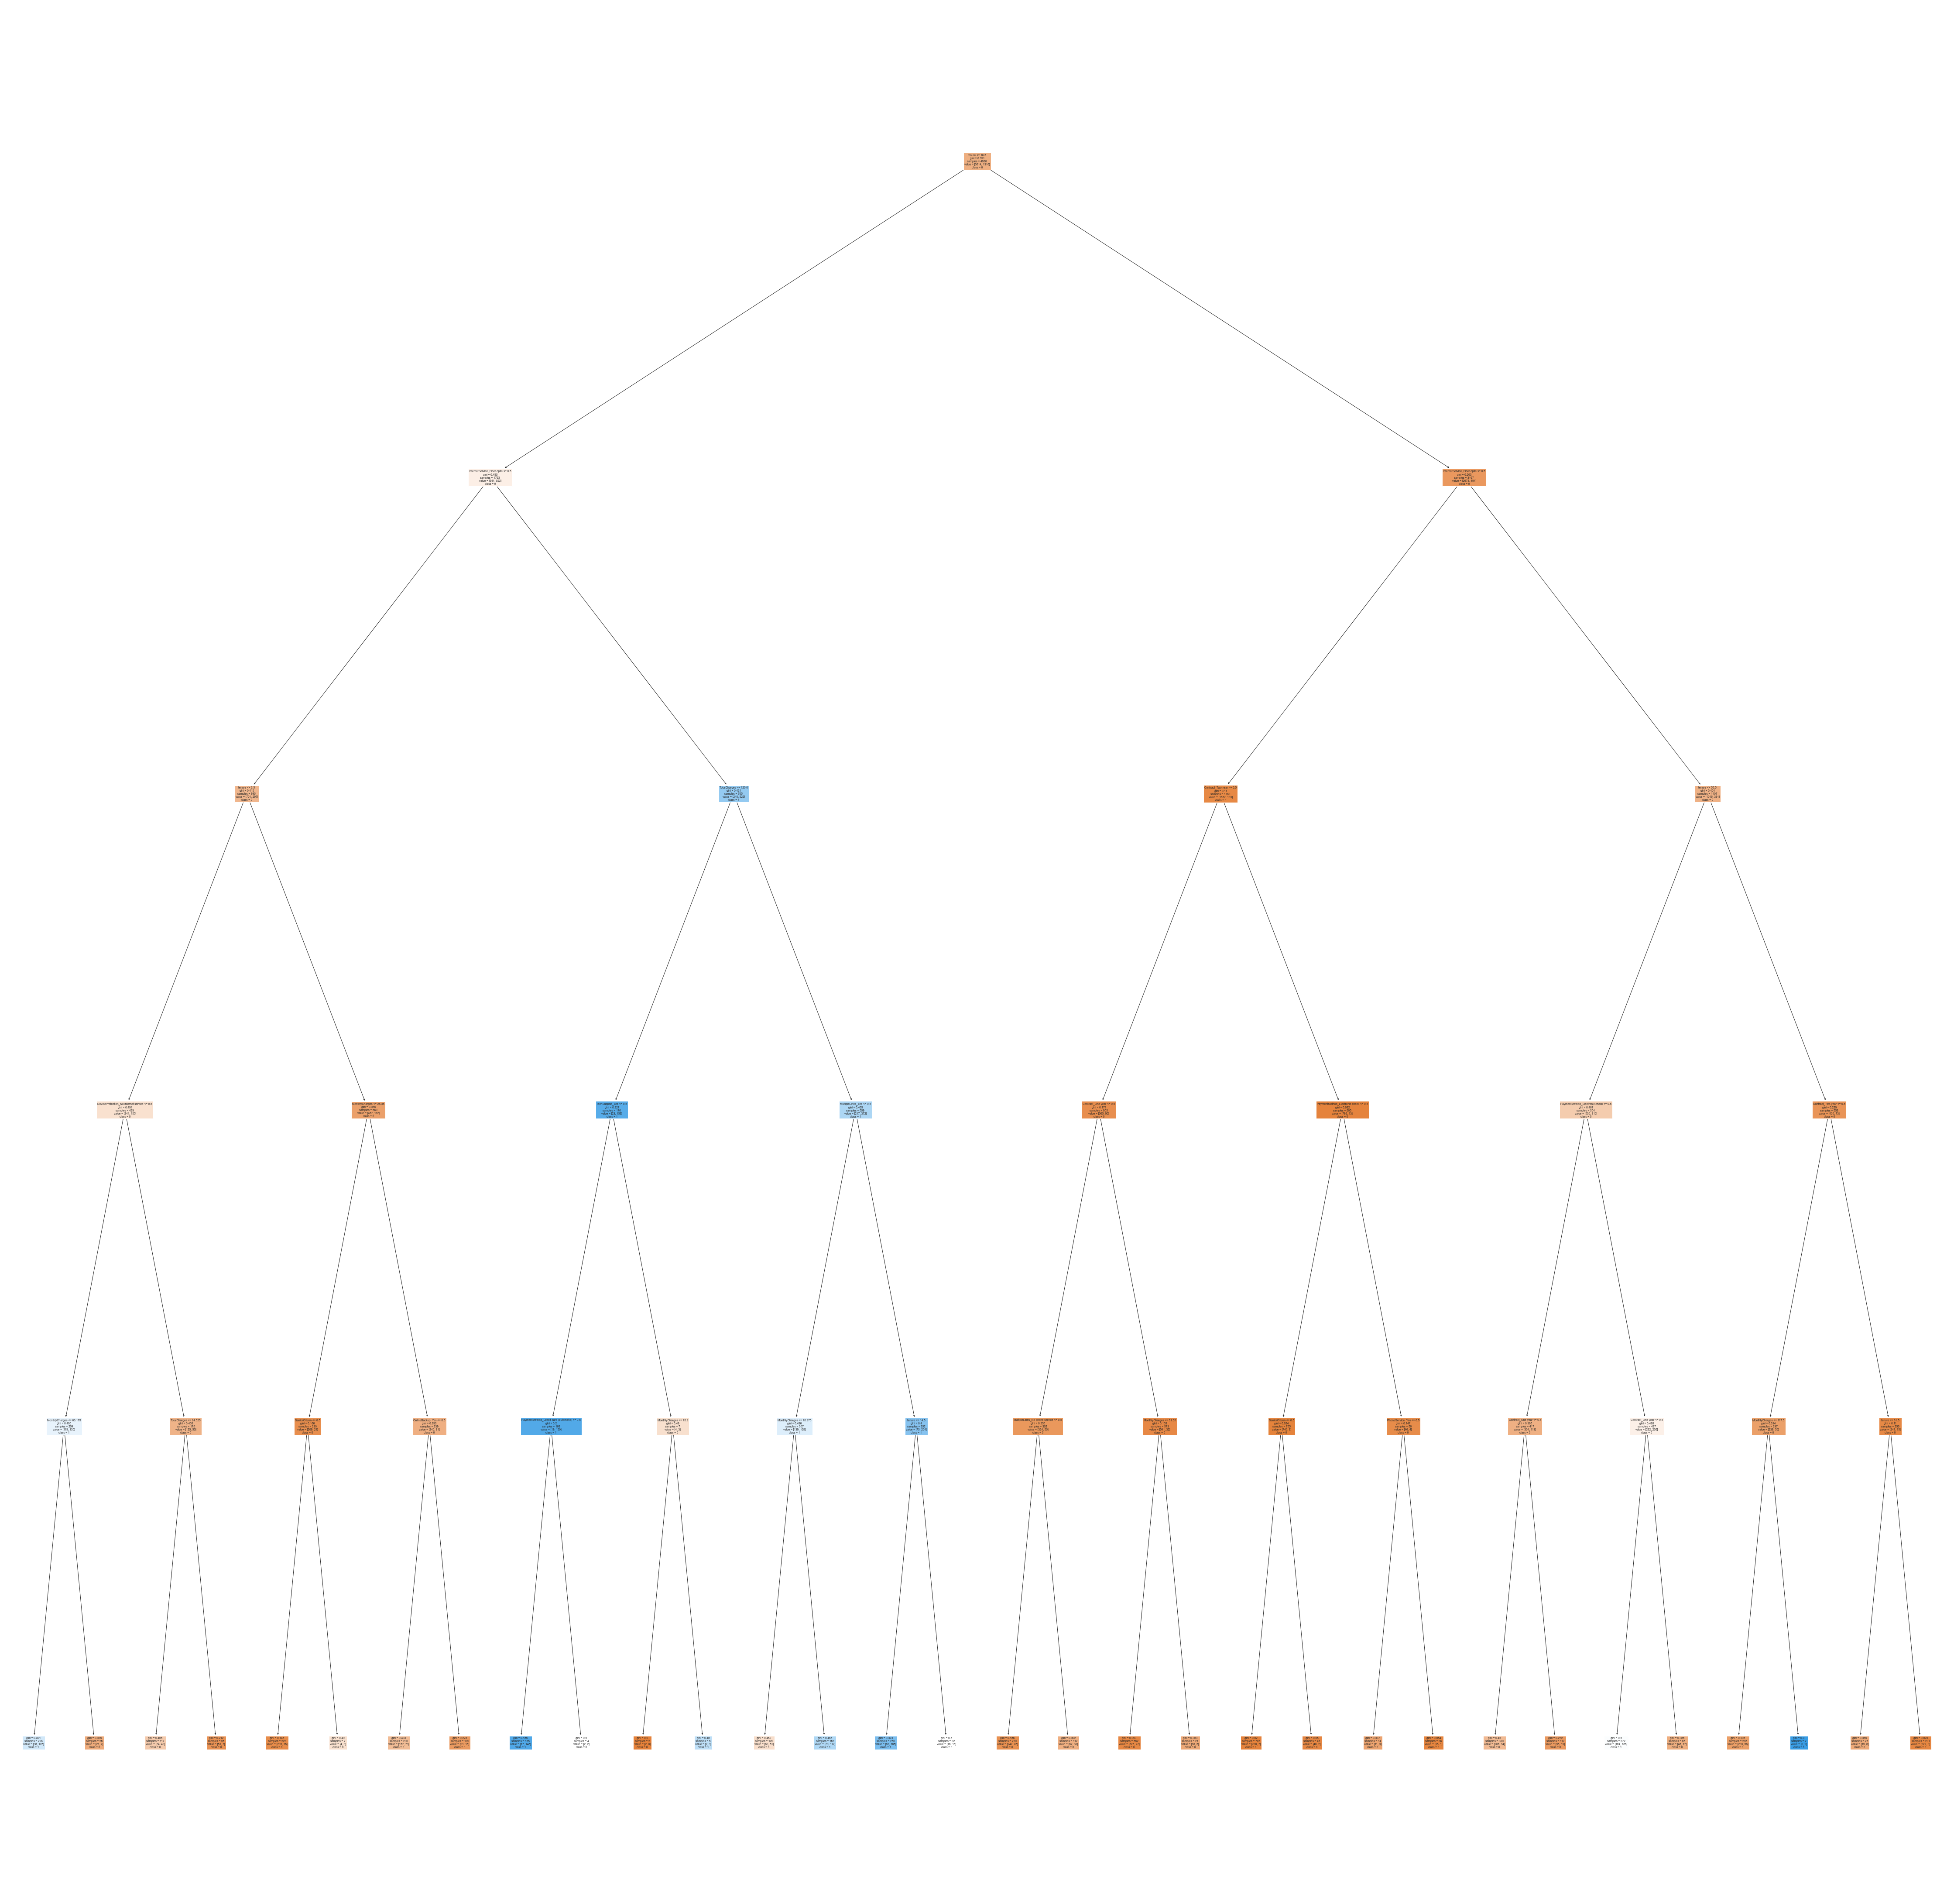

In [42]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80,80))
plot_tree(model,filled=True,feature_names=X_train.columns,class_names=['0','1']);
#plt.savefig('tree.png',dpi=400,bbox_inches='tight')
plt.show()